# Size of Obstacles in the augmented Dataset

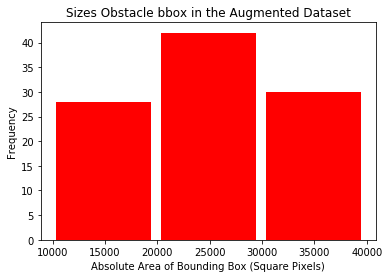

In [27]:
from pathlib import Path
from array import *
from scipy import stats
p=Path('./output_dir_cityscapes_rgbd/annotations_txt/')
bbox_data_files=list(p.glob('*.txt'))
#print(bbox_data_files)

upper_bound = 40000
areas = []
areas_limited_range=[]
outlier_imgs={}
#print(len(bbox_data_files))
for x in range(len(bbox_data_files)):
    #print(str(bbox_data_files[int(x)]))
    f = open(str(bbox_data_files[int(x)]),'r')
    for line in f.readlines():
        elts=line.strip('\n').split(' ')
        xmin,ymin,xmax,ymax=int(elts[-4]),int(elts[-3]),int(elts[-2]),int(elts[-1])
        #print(coords[0])
        if elts[4]=="0":
            area=float(xmax-xmin)*float(ymax-ymin)
            areas.append(area)      
            if area<upper_bound:
                areas_limited_range.append(area) 
           
        
plt.hist(areas_limited_range, bins=3, rwidth = 0.9, color = 'red')
plt.gca().set(title='Sizes Obstacle bbox in the Augmented Dataset', ylabel='Frequency', xlabel='Absolute Area of Bounding Box (Square Pixels)');


# Compare it to the size of GT in LaF

1030


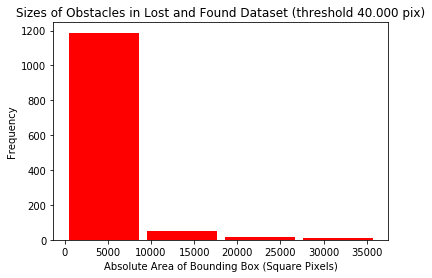

In [19]:
from pathlib import Path
from array import *
from scipy import stats
p=Path('/mnt/data1/datasets/laf_noblanks/bboxes/ObsAsZero_proportions/1.0xbbox/train/') #change this path if needed
bbox_data_files=list(p.glob('**/*.txt'))
#print(bbox_data_files)
areas = []
areas_limited_range=[]
outlier_imgs={}
print(len(bbox_data_files))
for x in range(len(bbox_data_files)):
    #print(str(bbox_data_files[int(x)]))
    f = open(str(bbox_data_files[int(x)]),'r')
    for line in f.readlines():
        coords=line.strip('\n').split(' ') 
        area=float(coords[3])*2048*float(coords[4])*1024
        areas.append(area)
        if area<40000:
            areas_limited_range.append(area)        
           
plt.hist(areas_limited_range, bins=4, rwidth = 0.9, color = 'red')
plt.gca().set(title='Sizes of Obstacles in Lost and Found Dataset (threshold 40.000 pix)', ylabel='Frequency', xlabel='Absolute Area of Bounding Box (Square Pixels)');


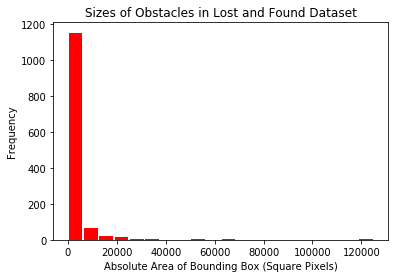

In [20]:
plt.hist(areas, bins=20, rwidth = 0.9, color = 'red')
plt.gca().set(title='Sizes of Obstacles in Lost and Found Dataset', ylabel='Frequency', xlabel='Absolute Area of Bounding Box (Square Pixels)');


# Additional :  Size of objects in RGBD dataset (without rescaling)

Size of the background image (pixels) : 
7476


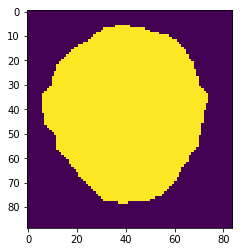

Size of the object (pixels) :  3601
Size of the object (pixels) :  4824


In [14]:
#Print size of a single object
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def dimension_bbox(ar):
#Takes in input an object mask (as an array of booleans) and return the area of the object bounding box (in pixels)
    x_true=[]
    y_true=[]
    for i in range(ar.shape[0]):
        if True in ar[i,:]:
              x_true.append(i)
    for j in range(ar.shape[1]):
        if True in ar[:,j]:
              y_true.append(j)
    #print(max(x_true),min(x_true))
    return((max(x_true)-min(x_true))*(max(y_true)-min(y_true)))


anno_path="/mnt/data1/Data_augmentation/syndata-generation/input_dir_cityscapes_rgbd/objects_dir/RGBD_objects/apple_1_1_104_maskcrop.png"
im = Image.open(anno_path)
width, height = im.size

#print(width, height)
print("Size of the background image (pixels) : ")
print(width*height)
plt.imshow(im)
plt.show()

#Nb of pixels of the object (= nb of 'True' elements in the maskarray).
ar=np.array(im)
print("Size of the object (pixels) : ", np.sum(ar))
print("Size of the object (pixels) : ", dimension_bbox(ar))

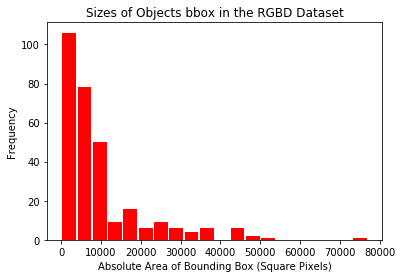

In [15]:
#Histogramm of size for the 300 RGBD objects
import os
anno_path="./input_dir_cityscapes_rgbd/objects_dir/RGBD_objects/"
mask_files=[file for file in os.listdir(anno_path) if file.endswith('_maskcrop.png')]
obj_sizes=[]
background_img_sizes=[]
for f in mask_files:
    im = Image.open(anno_path+f)
    width, height = im.size
    background_img_sizes.append(width*height)
    #print(im.size,width*height)
    size=dimension_bbox(np.array(im))
    obj_sizes.append(size)
    #print("Size of the object (pixels) : ", size)
plt.hist(obj_sizes, bins=20, rwidth = 0.9, color = 'red')
plt.gca().set(title='Sizes of Objects bbox in the RGBD Dataset', ylabel='Frequency', xlabel='Absolute Area of Bounding Box (Square Pixels)');
